In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import metrics
import numpy as np


In [ ]:
#Import Data

In [2]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [3]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
31713,0.42,Ideal,I,VS1,61.5,56.0,771,4.83,4.86,2.98
41758,0.43,Ideal,H,IF,62.2,55.0,1245,4.84,4.87,3.02
53072,0.71,Ideal,D,SI2,61.3,57.0,2610,5.71,5.78,3.52
48803,0.51,Ideal,F,VVS2,61.4,56.0,2025,5.16,5.17,3.17
37852,0.33,Premium,D,VVS2,62.6,56.0,1002,4.47,4.44,2.79


In [ ]:
#Wrangle Data.... YEEEE HAAAAAA!

In [18]:
Diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [30]:
def cut_recode (series): 
    if series == "Ideal":
        return 0
    if series == "Premium": 
        return 1
    if series == "Very Good": 
        return 2
    if series == "Good":
        return 3
    if series == "Fair":
        return 4
Diamonds['CutRecoded'] = Diamonds['cut'].apply(cut_recode)

In [31]:
Diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [46]:
def color_recode (series): 
    if series == "G":
        return 0
    if series == "E": 
        return 1
    if series == "F": 
        return 2
    if series == "H":
        return 3
    if series == "D":
        return 4
    if series == "I":
        return 5
    if series == "J":
        return 6
Diamonds['ColorRecoded'] = Diamonds['color'].apply(color_recode)

In [47]:
Diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [48]:
def clarity_recode (series): 
    if series == "SI1":
        return 0
    if series == "VS2": 
        return 1
    if series == "SI2": 
        return 2
    if series == "VS1":
        return 3
    if series == "VVS2":
        return 4
    if series == "VVS1":
        return 5
    if series == "IF":
        return 6
    if series == "I1":
        return 7
Diamonds['ClarityRecoded'] = Diamonds['clarity'].apply(clarity_recode)

In [49]:
Diamonds['Carat'] = Diamonds['carat'].apply(int)
Diamonds['Depth'] = Diamonds['depth'].apply(int)
Diamonds['Table'] = Diamonds['table'].apply(int)
Diamonds['Price'] = Diamonds['price'].apply(int) 
Diamonds['X'] =Diamonds['x'].apply(int)
Diamonds['Y'] =Diamonds['y'].apply(int)
Diamonds['Z'] =Diamonds['z'].apply(int)

In [50]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,CutRecoded,Carat,ColorRecoded,ClarityRecoded,Depth,Table,Price,X,Y,Z
31713,0.42,Ideal,I,VS1,61.5,56.0,771,4.83,4.86,2.98,0,0,5,3,61,56,771,4,4,2
41758,0.43,Ideal,H,IF,62.2,55.0,1245,4.84,4.87,3.02,0,0,3,6,62,55,1245,4,4,3
53072,0.71,Ideal,D,SI2,61.3,57.0,2610,5.71,5.78,3.52,0,0,4,2,61,57,2610,5,5,3
48803,0.51,Ideal,F,VVS2,61.4,56.0,2025,5.16,5.17,3.17,0,0,2,4,61,56,2025,5,5,3
37852,0.33,Premium,D,VVS2,62.6,56.0,1002,4.47,4.44,2.79,1,0,4,4,62,56,1002,4,4,2


In [51]:
# Define 'x' and 'y' axises 

In [52]:
x = Diamonds[['CutRecoded','Carat','ColorRecoded','ClarityRecoded', 'Depth','Table', 'X', 'Y', 'Z']]

In [53]:
y = Diamonds[['Price']]

In [54]:
#Train/Test Split Data

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [56]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(32364, 9) (32364, 1)
(21576, 9) (32364, 1)


In [57]:
#Create the Model

In [58]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [59]:
predictions = lm.predict(x_test)
predictions

array([[ 479.69399462],
       [2526.43744254],
       [7027.69031014],
       ...,
       [2979.49545795],
       [ 598.59399105],
       [ 285.27636027]])

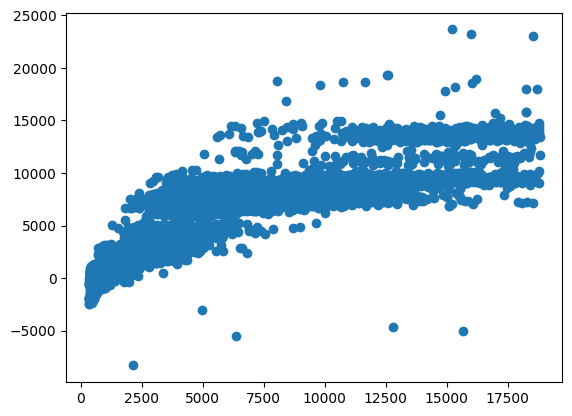

In [60]:
plt.scatter(y_test, predictions)

In [63]:
#Model Accuracy: 82% Accurate... Awesome Oppossum!


In [64]:
print("Score:", lm.score(x_test, y_test))

Score: 0.8229019438618415


In [69]:
#Error Rates for Model Fit: Considering I wanted zero.... This is not great. :(

In [66]:
metrics.mean_absolute_error(y_test, predictions)

1097.1035503683393

In [67]:
metrics.mean_squared_error(y_test, predictions)

2782503.537297335

In [68]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1668.0837920492288